In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# PreProcessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,RobustScaler,MinMaxScaler
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Splitting Data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Resampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline

# Modeling, Fitting and Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, roc_auc_score, plot_roc_curve,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

import joblib

# EDA

In [54]:
data = pd.read_csv("hotel_bookings.csv") #import file

In [117]:
data_eda=data[['hotel','is_canceled','adults','children','babies','meal','country','market_segment','distribution_channel','reserved_room_type','booking_changes','deposit_type','days_in_waiting_list','customer_type','required_car_parking_spaces','total_of_special_requests']].loc[:4999]
data_eda #pemilihan column utk eda proses

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4996,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4997,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4998,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0


In [58]:
data_eda.info() #cek type column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        5000 non-null   object 
 1   is_canceled                  5000 non-null   int64  
 2   adults                       5000 non-null   int64  
 3   children                     5000 non-null   float64
 4   babies                       5000 non-null   int64  
 5   meal                         5000 non-null   object 
 6   country                      4998 non-null   object 
 7   market_segment               5000 non-null   object 
 8   distribution_channel         5000 non-null   object 
 9   reserved_room_type           5000 non-null   object 
 10  booking_changes              5000 non-null   int64  
 11  deposit_type                 5000 non-null   object 
 12  days_in_waiting_list         5000 non-null   int64  
 13  customer_type     

**Profil Tamu**

In [156]:
data_profil=data_eda[['is_canceled','customer_type','adults','children','babies','country','market_segment']]

In [ ]:
#pengambilan column utk profil 

In [157]:
#fungsi visualisasi 
def plot_bar(column):
    # temp df 
    temp_1 = pd.DataFrame()
    # count categorical values
    temp_1['no'] = data_profil[data_profil['is_canceled'] == 0.0][column].value_counts()
    temp_1['yes'] = data_profil[data_profil['is_canceled'] == 1.0][column].value_counts()
    temp_1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('number of people')
    plt.title('Distribution of {} and Target'.format(column))
    plt.show()

In [158]:
#fungsi perhitungan perbandingan antara no : yes
def perbandingan(column):
    # count categorical values
    no = data_profil[data_profil['is_canceled'] == 0.0][column].value_counts()
    yes = data_profil[data_profil['is_canceled'] == 1.0][column].value_counts()
    count = no/yes
    category = pd.DataFrame(count)
    categoryy = category.sort_values(by=[column])
    print (categoryy)

In [159]:
#pengambilan column numeric
col_obj_numer= list(data_profil.select_dtypes(['int64','float64']).columns.drop(['is_canceled']))
col_obj_numer

['adults', 'children', 'babies']

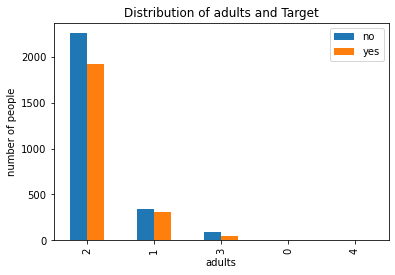

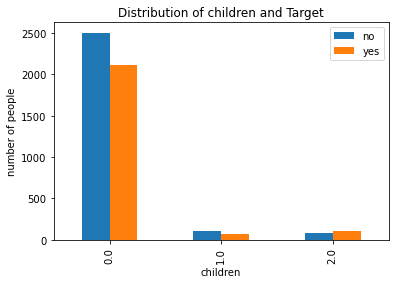

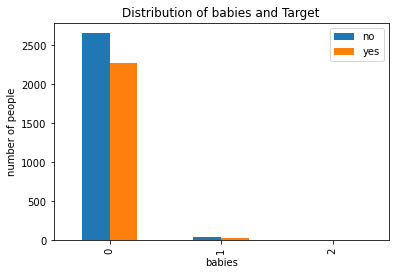

In [160]:
for i in col_obj_numer:
    plot_bar(i)

In [161]:
#perbandingan col numeric 
for i in col_obj_numer:
    perbandingan(i)
    print('\n###########')

      adults
1   1.130293
2   1.172216
3   1.862745
4   2.000000
0   5.000000
5        NaN
6        NaN
10       NaN
20       NaN
26       NaN
27       NaN
40       NaN
50       NaN
55       NaN

###########
      children
2.0   0.830189
0.0   1.181604
1.0   1.535211
10.0       NaN

###########
    babies
0  1.16762
1  1.88000
2      NaN

###########


In [162]:
col_obj_cat= list(data_profil.select_dtypes(['object']))
col_obj_cat

['customer_type', 'country', 'market_segment']

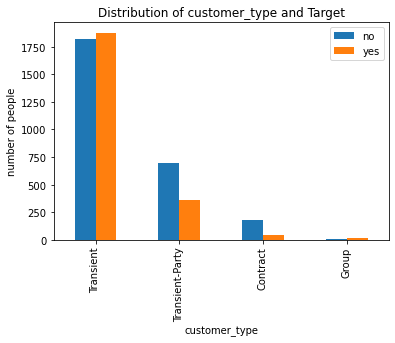

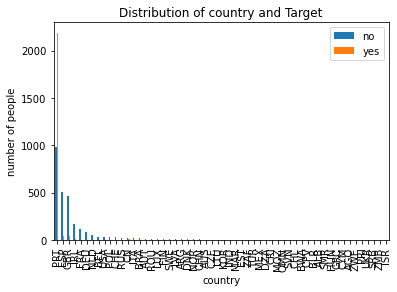

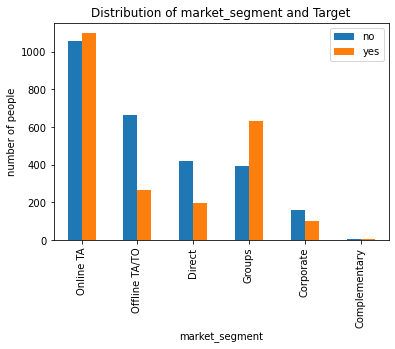

In [163]:
#visualisasi col Category
for i in col_obj_cat:
    plot_bar(i)

In [115]:
#perbandingan col category
for i in col_obj_cat:
    perbandingan(i)
    print('\n###########')

      adults
1   1.130293
2   1.172216
3   1.862745
4   2.000000
0   5.000000
5        NaN
6        NaN
10       NaN
20       NaN
26       NaN
27       NaN
40       NaN
50       NaN
55       NaN

###########
      children
2.0   0.830189
0.0   1.181604
1.0   1.535211
10.0       NaN

###########
    babies
0  1.16762
1  1.88000
2      NaN

###########


**Kesimpulan Data Profil X Target**
>*ADULT X Target:
*kebanyakan pengunjung membawa anak sebanayak 2anak,pengunjung yang tidak membawa adult cenderung tidak membatalkan reservasi hotel. dan pengunjung hotel 

>*Children X Target :
*pengunjung yang reservasi dengan jumlah anak kecil 2 lebih cenderung untuk membatalkan booking dibanding yang jumlah anak =1.hal ini bisa disebabkan karena pembatalan pergi/liburan karena alasan pribadi yang mnyangkut anak kecil(misal :sakit) ,pengunjung didominasi oleh orang-orang yang tidak membawa anak kecil.

>* Babies X Target :
*pengunjung yang reservasi dengan tidak mencantumkan jumlah babies /0 cenderung membatalkan pesanan. pengunjung didominasi oleh pengunjung yang tidak membawa bayi. hal ini bisa menjadi catatan khusus untuk mentreatmen khusus orang-orang yang mencantumkan jumlah bayi agar lebih nyaman dan tidak membatalkan booking

>*Customr_type X Target:
*Pengunjung group dan transient lebih cenderung membatalkan booking, bahkan nilai perbandingannya sangat besar. sehingga bisa dievaluasi kembali pelayanan yang tepat untuk pengunjung group dan transient, serta penambhan pelayanan agar meningkatkan pengunjung group,terlebih pengunjung hotel didominasi oleh tipe transient.

>*CountryX Target:
*pengunjung yang berasal dari country dengan kode FRA lebih cenderung tidak membatalkan reservasi dan dari country PRT cenderung membatalkan reservasi. 

>*market_segment X Target :
*pengunjung dengan segment groups lebih cenderung membatalkan reservasi, hal ini linier dengan customer type. sehingga memang diperlukan treatmen khusus untuk customer group


**Behavior**

In [138]:
data_behavior=data_eda[['is_canceled','meal','reserved_room_type','booking_changes','required_car_parking_spaces','deposit_type','total_of_special_requests','days_in_waiting_list']]

In [ ]:
#pengambilan column utk behavior

In [139]:
data_behavior

,is_canceled,meal,reserved_room_type,booking_changes,required_car_parking_spaces,deposit_type,total_of_special_requests,days_in_waiting_list
0,0,BB,C,3,0,No Deposit,0,0
1,0,BB,C,4,0,No Deposit,0,0
2,0,BB,A,0,0,No Deposit,0,0
3,0,BB,A,0,0,No Deposit,0,0
4,0,BB,A,0,0,No Deposit,1,0
...,...,...,...,...,...,...,...,...
4995,1,HB,D,0,0,Non Refund,0,0
4996,1,HB,D,0,0,Non Refund,0,0
4997,1,HB,A,0,0,Non Refund,0,0
4998,1,HB,A,0,0,Non Refund,0,0


In [140]:
data_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   is_canceled                  5000 non-null   int64 
 1   meal                         5000 non-null   object
 2   reserved_room_type           5000 non-null   object
 3   booking_changes              5000 non-null   int64 
 4   required_car_parking_spaces  5000 non-null   int64 
 5   deposit_type                 5000 non-null   object
 6   total_of_special_requests    5000 non-null   int64 
 7   days_in_waiting_list         5000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 312.6+ KB


In [141]:
#fungsi visulisasi beahvior
def plot_bar2(column):
    # temp df 
    temp_1 = pd.DataFrame()
    # count categorical values
    temp_1['no'] = data_behavior[data_behavior['is_canceled'] == 0.0][column].value_counts()
    temp_1['yes'] = data_behavior[data_behavior['is_canceled'] == 1.0][column].value_counts()
    temp_1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('number of people')
    plt.title('Distribution of {} and Target'.format(column))
    plt.show()

In [142]:
#perbandingan nilai behavior antara no dan yes cancel
def perbandingan2(column):
    # count categorical values
    no = data_behavior[data_behavior['is_canceled'] == 0.0][column].value_counts()
    yes = data_behavior[data_behavior['is_canceled'] == 1.0][column].value_counts()
    count = no/yes
    category = pd.DataFrame(count)
    categoryy = category.sort_values(by=[column])
    print (categoryy)

In [147]:
#pengambilan data numeric
col_obj_numer2= list(data_behavior.select_dtypes(['int64']).columns.drop(['is_canceled']))

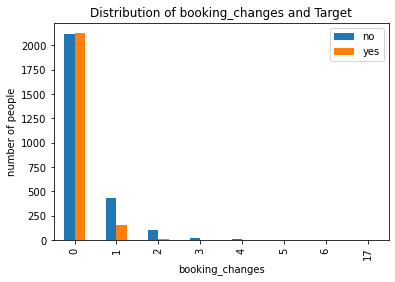

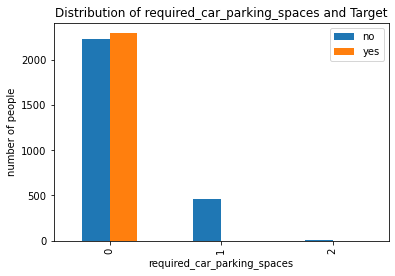

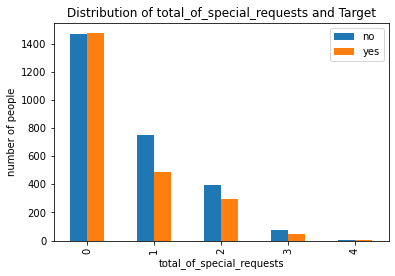

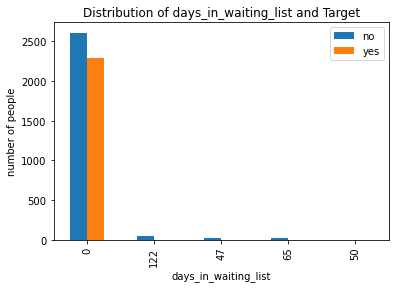

In [148]:
#visualisasi col numeric behavior
for i in col_obj_numer2:
    plot_bar(i)

In [152]:
#hitung perbandingan colm numeric
for i in col_obj_numer2:
    perbandingan(i)
    print('\n###########')

    booking_changes
0          0.995296
1          2.803922
3          6.750000
4          8.000000
2          8.230769
5               NaN
6               NaN
17              NaN

###########
   required_car_parking_spaces
0                     0.972585
1                          NaN
2                          NaN

###########
   total_of_special_requests
0                   0.997963
2                   1.346939
1                   1.554639
3                   1.750000
4                   2.500000

###########
     days_in_waiting_list
0                1.136324
122             26.000000
47                    NaN
50                    NaN
65                    NaN

###########


In [149]:
#pengambilan column category
col_obj_cat2= list(data_behavior.select_dtypes(['object']))
col_obj_cat2

['meal', 'reserved_room_type', 'deposit_type']

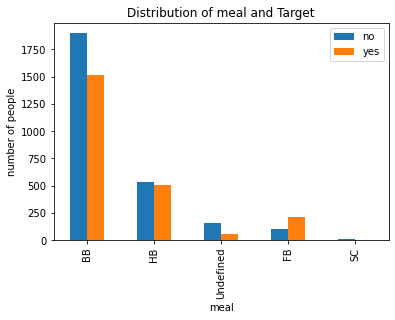

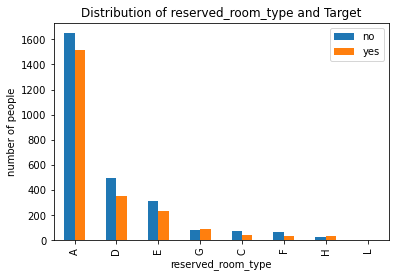

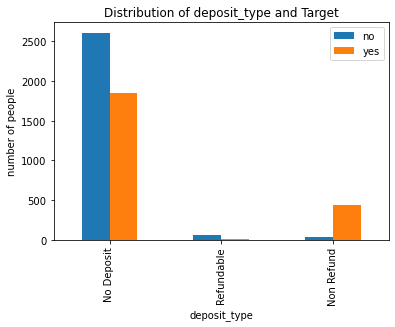

In [150]:
#visualisasi Category
for i in col_obj_cat2:
    plot_bar(i)

In [153]:
#hitung perbandingan dr col category
for i in col_obj_cat2:
    perbandingan(i)
    print('\n###########')

                meal
FB          0.490654
HB          1.041339
BB          1.250165
Undefined   2.785714
SC         13.000000

###########
   reserved_room_type
H            0.800000
G            0.898876
A            1.087673
E            1.327586
D            1.420000
C            1.725000
L            2.000000
F            2.060606
P                 NaN

###########
            deposit_type
Non Refund      0.089041
No Deposit      1.408747
Refundable      6.750000

###########


**KESIMPULAN BEHAVIOR**
>* Booking_change X target :
*pengunjung yang tidak melakukan booking change cenderung membatalkan reservasi dibandingkan pengunjung yang melakukan beberapa kali booking change. hal ini bisa disebabkan karena pengunjung yang melakukan bookingchange sudah nyaman karna apa yang diminta dan diinginkan bisa dipenuhi oleh hotel. dan pengunjung didominasi oleh pengunjung yang tidak melakukan booking change 

>* required_car_parking_spaces X Target:
*pengunjung yang tidak meminta parking space lbh cenderung untuk membatalkan reservasi, dan pengunjung didominasi oleh orang-orang yang tidak meminta parking space, artinya banyak yang berkunjung tanpa membawa kendaraan pribadi

>* Special Request X target :
*pengunjung yang tidak meminta special request cenderung membatalkan reservasi dibandingkan yang banyak meminta special requst, hal ini linier dengan booking change. jadi hotel bisa lebih menawarkan specil request kepada setiap tamu yang di prediksi akan membatalkan reservasi. pengunjung didominasi oleh orang-orang yang tidak meminta special request

>*days_in_waiting_list X Target:
*pengunjung waiting list cenderung tidak membatalkan reservasi dibandingkan yang tidak memiliki waiting list, hal ini bisa disebabkan karena pengunjung waiting list telah merencanakan segala agenda dengan matang. dibandingkan yang tidak memiliki waiting list. pengunjung didominasi oleh orang-orang yang tidak waiting list

>*Meal X target:
*pengunjung dengan meal FB cenderung membatalkan request dibandingkan dengan yang lain, terlebh SC yang sangat cenderung untuk tidak membatalkan reservasi. namun pengunjung didominasi dengan meal BB yang masih memiliki kecenderungan untuk membatalkan requst namun tidak sebanyak FB, sehingga untuk pengunjung dengan meal FB lebih di treatmen. dan mempertahankan serta meningkatan treatmen ke pengunjung meal BB karena dia yg mendominasi.

>*Reserved room X target :
*pengunjung dengan type room H dan G cenderung membatalkan reservasi dibandingkan yang lain. hal ini bisa digunakan untuk evaluasi serta memperbaiki apa yang kurang dari room H berdasarkan saran dari pengunjung.

>*deposit type X target:
*pengnjung dengan deposite type non refund cenderung membatalkan reservasi dibandingkan yang refundable.

**SUMMARY EDA**

**Profil**
pengunjung didominasi dengan profil :
Berasal dari kota PRT, dengan type transient, dengan tidak membawa bayi/anak kecil serta market segment online
*dari profil ini serta bisa digunakan evaluasi untuk meningkatkan pengunjung dengan profil yang lain*

**Behavior**
pengunjung didominasi dengan kebiasaan :
pesan makanan dengan tipe BB, dengan room A, tidak menggunakan deposit, tidak melalkukan booking change special request dan tidak waitinglist
*dari kebiasaan yang telah diketahui bisa digunakan untuk meningkatkan pelayanan hotel agar pengunjung semakin nyaman*

# B. Data Cleaning & Preprocessing (15 poin)

**Data**

In [2]:
data = pd.read_csv("hotel_bookings.csv")

In [3]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
data_ML=data[['hotel','is_canceled','adults','children','babies','meal','country','market_segment','distribution_channel','reserved_room_type','booking_changes','deposit_type','days_in_waiting_list','customer_type','required_car_parking_spaces','required_car_parking_spaces']].loc[:4999]
data_ML

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,required_car_parking_spaces
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4996,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4997,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4998,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0


**Missing Value**

In [5]:
data_ML.isna().sum()

hotel                          0
is_canceled                    0
adults                         0
children                       0
babies                         0
meal                           0
country                        2
market_segment                 0
distribution_channel           0
reserved_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
required_car_parking_spaces    0
dtype: int64

In [6]:
data_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        5000 non-null   object 
 1   is_canceled                  5000 non-null   int64  
 2   adults                       5000 non-null   int64  
 3   children                     5000 non-null   float64
 4   babies                       5000 non-null   int64  
 5   meal                         5000 non-null   object 
 6   country                      4998 non-null   object 
 7   market_segment               5000 non-null   object 
 8   distribution_channel         5000 non-null   object 
 9   reserved_room_type           5000 non-null   object 
 10  booking_changes              5000 non-null   int64  
 11  deposit_type                 5000 non-null   object 
 12  days_in_waiting_list         5000 non-null   int64  
 13  customer_type     

pada columns country memiliki Missing value, dan column bertipe object jadi akan di proses di preprocessing dan di encoding. Missing Value akan diisi dengan nilai yang sering muncul

In [39]:
data_ML.describe()

,is_canceled,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.459600,1.969800,0.115600,0.014800,0.207200,1.772000,0.093800,0.602000
std,0.498415,1.566326,0.444833,0.122409,0.612489,13.545358,0.292948,0.823245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,55.000000,10.000000,2.000000,17.000000,122.000000,2.000000,4.000000


# **Preprocessing**

**Processing scheme :**

* binary : countyry,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
#semua di binary karena column clasifikasi tdk memiliki tingkatan semua, atau termasuk dalam data nominal
* Passthrough : is_canceled,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
* Drop : Resort Hotel #karna tidak berpengaruh pada prediksi

*tidak perlu scalling karena jarak satuan data ditiap column numeric tidak terlalu jauh, jadi Scalling langsung ke model KNN menggunanakan MinMax Scaller, karna KNN metode yang menggunkan jarak sehingga perlu scalling*

In [7]:
data_ML.describe(exclude='number')

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
count,5000,5000,4998,5000,5000,5000,5000,5000
unique,1,5,56,6,3,9,3,4
top,Resort Hotel,BB,PRT,Online TA,TA/TO,A,No Deposit,Transient
freq,5000,3418,3174,2156,3657,3167,4461,3699


In [34]:
binary_encoder_pipe=Pipeline([
    ('encoder',SimpleImputer(strategy='most_frequent')),
    ('binary encoder',ce.BinaryEncoder())
])

In [35]:
transformer = ColumnTransformer([
    ('binary',binary_encoder_pipe,['country','meal','market_segment','distribution_channel','reserved_room_type','deposit_type','customer_type']),
    ],remainder='passthrough')

In [36]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('binary',
                                 Pipeline(steps=[('encoder',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('binary encoder',
                                                  BinaryEncoder())]),
                                 ['country', 'meal', 'market_segment',
                                  'distribution_channel', 'reserved_room_type',
                                  'deposit_type', 'customer_type'])])

In [37]:
#test trasformer
transformer.fit_transform(data_ML)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

**Outlier**

In [167]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3-q1

In [168]:
((data < (q1-1.5*IQR)) | (data > (q3+1.5*IQR))).sum()/len(data)*100

adr                                3.176983
adults                            24.884831
agent                              0.000000
arrival_date_day_of_month          0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_year                  0.000000
assigned_room_type                 0.000000
babies                             0.768071
booking_changes                   15.140297
children                           7.194907
company                            0.000000
country                            0.000000
customer_type                      0.000000
days_in_waiting_list               3.097412
deposit_type                       0.000000
distribution_channel               0.000000
hotel                              0.000000
is_canceled                        0.000000
is_repeated_guest                  3.191222
lead_time                          2.516961
market_segment                     0.000000
meal                            

Data memiliki banyak outlier , sehingga bisa digunakan metode yang tidak sensitif terhap outlier

# C. Model Benchmark & Evaluation Metric (40 poin)

**Define Model**

In [38]:
logreg = LogisticRegression()
tree = DecisionTreeClassifier(random_state = 1414)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state = 1414 )

**Data Splitting**

In [39]:
X= data_ML.drop(['is_canceled','hotel'],axis=1)
y= data_ML['is_canceled']

In [40]:
X.shape

(5000, 14)

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.3,random_state=1414)

In [42]:
#splitting data untuk train dan tes, menggunakan random state 1414 karna x.shape 15(namun random state bisa menggunakan angka berapa saja)

**Modelling**

In [170]:
logreg_pipe = Pipeline([
    ('transform',transformer),
    ('scaler',RobustScaler()),
    ('logreg',logreg)
])

tree_pipe= Pipeline([
    ('transform',transformer),
    ('tree',tree)
])

knn_pipe =Pipeline([
    ('transform',transformer),
    ('scaler',MinMaxScaler()),
    ('knn',knn)
])

rf_pipe = Pipeline([
    ('transform',transformer),
    ('rf',rf)
])

Target data merupakan clasifikasi(1,0) maka akan menggunakan metode Classifikasi dari Supervised Learning

*Model yang akan di coba ada 4 yaitu logisticregression, Decision Tree, KNN dan Random Forest. Sebenarnya masih ada model lain dari Classifikasi yakni Boosting, namun boosting cukup memakan waktu dalam prosesnya. jadi Bossting akan dijadikan pilihan terakhir apabila nilai accuracy masih rendah*

**Cara Kerja Model**
>**Logistic Regression**
*cara kerja dengan melihat kesuksesan peluang dari klas (1 &0), biasanya Logistic regression memiliki nilai yang stabil dibanding yang lain. pada model logistic regresi dilakukan scalling karena ada beberapa column numeric yang memiliki outlier dan scaling yng digunakan robust scaller yang tahan terhdap outlier*

>**Decision Tree**
*Model ini merupakan model non parametic dengan cara kerja splitting data hingga data tersebut menjadi homogen (serangkaian question yes/no untuk mencapai suatu klas(kelas 1/0)*

>**KNN**
*Model ini juga digunakan untuk metode non parametic, bekerja dengan cara melihat data dari tetangganya, dan ikut klas mayoritas dari tetangganya. KNN memiliki hasil prediksi yang cukup baik, dan KNN perlu di scalling untuk meminimalisir dominasi dari feature yang besar, sehingga feature yang kecil masih terlihat perannya*

>**Random Forest**
*Memiliki cara kerja yang mirip dengan Decission Tree, namun Randomforest membuat banyak pohon, bukan hanya 1 pohon dan sample diboostrap dan pengambilan feature secara random. kelebihan dari random forest adalah bisa menyesuaikan data*

**Analysis**

* *0 = No Cancel*
* *1 = cancel*

        - TN: Pengunjung yang diprediksi tidak cancel, actualnya tidak cancel
        - TP: Pengunjung yang diprediksi akan cancel, actualnya memang cancel
        - FP: Pengunjung yang diprediksi akan cancel, actualnya tidak cancel
        - FN: Pengunjung yang diprediksi tidak cancel, actualnya cancel

2 Kesalahan yang terjadi:
* FP: Salah prediksi, hotel hanya kehilangan pengunjung yang akan menginap.
* FN: Perusahaan lebih rugi waktu, tenaga dan financial, karena telah menyiapkan segala sesuatu untuk kedatangan pengunjung termasuk menolak pengunjung lain, namun ternyata cancel.

**A. jadi kesalahan yang paling berpengaruh untuk kerugian financial adalah FN**

**B. Metric evaluasi yang dipilih adalah Recall karena akan menekan nilai FN, Nilai FN dan Recall berbanding terbalik**

**Cek Balancing Data**

In [44]:
data_ML['is_canceled'].value_counts()/data_ML.shape[0]*100

0    54.04
1    45.96
Name: is_canceled, dtype: float64

sebenranya tidak ada indikasi imbalance dataset karna perbedaan di bawah 10%, namun jika nilai accuracy yg didapat masih rendah maka bisa di coba untuk balancing data set agar 50:50. 

**Cross Validation**

In [171]:
def model_evaluation(model, metric):
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(model, X_train, y_train, cv = skfold, scoring = metric)
    return model_cv

In [172]:
logreg_pipe_cv = model_evaluation(logreg_pipe, 'recall')
tree_pipe_cv = model_evaluation(tree_pipe, 'recall')
knn_pipe_cv = model_evaluation(knn_pipe, 'recall')
rf_pipe_cv = model_evaluation(rf_pipe,'recall')

**Fitting Data**

In [173]:
for model in [logreg_pipe, tree_pipe, knn_pipe, rf_pipe]:
    model.fit(X_train, y_train)

**Result**

In [174]:
score_mean = [logreg_pipe_cv.mean(), tree_pipe_cv.mean(), knn_pipe_cv.mean(),
              rf_pipe_cv.mean()]
score_std = [logreg_pipe_cv.std(), tree_pipe_cv.std(), knn_pipe_cv.std(),
             rf_pipe_cv.std()]
score_recall_score = [recall_score(y_test, logreg_pipe.predict(X_test)),
            recall_score(y_test, tree_pipe.predict(X_test)), 
            recall_score(y_test, knn_pipe.predict(X_test)), 
            recall_score(y_test, rf_pipe.predict(X_test))]
method_name = ['Logistic Regression', 'Decision Tree Classifier',
              'KNN Classifier', 'Random Forest Classifier']
cv_result = pd.DataFrame({
    'method': method_name,
    'mean score': score_mean,
    'std score': score_std,
    'recall score': score_recall_score
})
cv_result

,method,mean score,std score,recall score
0,Logistic Regression,0.935367,0.016232,0.927431
1,Decision Tree Classifier,0.885016,0.023682,0.896952
2,KNN Classifier,0.904307,0.020484,0.908563
3,Random Forest Classifier,0.898073,0.018780,0.910015


Dari perbandingan hasil diatas, maka akan dipilih model logistic regresi karena memiliki nilai recall paling tinggi dan std yg rendah

# D. Hyperparameter Tunning

karena performa model belum cukup memuaskan maka akan dicoba dilakukan hyperparameter tunning untuk meningkatkan performa model serta melihat untuk case ini perlu dilakukan tunning atau tidak

In [49]:
estimator = Pipeline([
    ('transform',transformer),
    ('model',logreg)
])

hyperparam_space = {
    'model__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'model__solver': ['liblinear', 'newton-cg']
}

random = RandomizedSearchCV(
                estimator,
                param_distributions = hyperparam_space,
                cv = StratifiedKFold(n_splits = 5),
                scoring = 'recall',
                n_iter = 10,
                n_jobs = -1)

random.fit(X_train, y_train)

print('best score', random.best_score_)
print('best param', random.best_params_)

best score 0.9353669627135698
best param {'model__solver': 'liblinear', 'model__C': 10}


Berdasarkan proses modelling diatas, maka model terbaik adalah :
Logistic regresi dengan solver 'newton-cg',dan model 1
    

# Before Vs After Tunning

In [50]:
estimator.fit(X_train, y_train)
y_pred_estimator = estimator.predict(X_test)
recall_estimator = recall_score(y_test, y_pred_estimator)

random.best_estimator_.fit(X_train, y_train)
y_pred_random = random.best_estimator_.predict(X_test)
recall_best_estimator = recall_score(y_test, y_pred_random)

In [51]:
score_list = [recall_estimator, recall_best_estimator]
method_name = ['Logreg Before', 'Logreg After']
best_summary = pd.DataFrame({
    'method': method_name,
    'score': score_list
})
best_summary

,method,score
0,Logreg Before,0.927431
1,Logreg After,0.933237


Setelah dilakukan HyperparameterTunning performa model naik dari 0,92 menjadi 0,93, sehingga akan dipilih model aftertunning

# Summary


Setelah Anda memilih benchmark model terbaik, lakukan hyperparameter tunning untuk meningkatkan preforma model Anda! Parameter apa saja yang anda pilih untuk tunning? Jelaskan maksud dari tiap-tiap parameter tersebut!

Bagaimana performa model Anda setelah Hyper-parameter Tuning? Apakah ada tahap lanjutan yang bisa Anda lakukan untuk meningkatkan performa model lebih jauh? Buat kesimpulan akhir, model mana yang akan Anda pakai untuk memprediksi apakah user akan cancel booking atau tidak!

Menggunakan Randomize tunning karena random memiliki proses yang cepat dan tidak terlalu berat karena memilih parameter secara random, sedangkan GridSearch memilih semua kemungkinan pasangan dari setiap parameternya.
parameter yang digunakan untuk tunning:
**'model__C': [100, 10, 1, 0.1, 0.01, 0.001]**
**'model__solver': ['liblinear', 'newton-cg']**
C memiliki 6 hyperparameter  
cross validasi: 5 fold  
dan model solver yg akan di coba adalah liblinear dan newton-cg untuk perbandingan

# Saving Model

In [ ]:
joblib.dump(grid.best_estimator_,'hotelbook')